In [2]:
import math
import torch
import matplotlib.pyplot as plt

In [3]:
fpath = "./outputs/"

range_ = 10.0
n_pts = 25

In [4]:
fname = "high_loss_" + str(range_) + "_" + str(n_pts)
fname = fname.replace(".", "_")
high_loss = torch.load(fpath + fname, map_location=("cpu"))

fname = "low_loss_" + str(range_) + "_" + str(n_pts)
fname = fname.replace(".", "_")
low_loss = torch.load(fpath + fname, map_location=("cpu"))

fname = "full_loss_" + str(range_) + "_" + str(n_pts)
fname = fname.replace(".", "_")
full_loss = torch.load(fpath + fname, map_location=("cpu"))

In [5]:
ymax = 2500

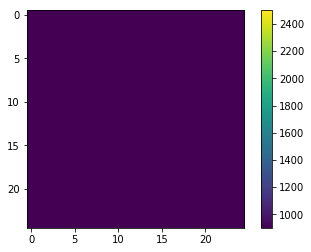

In [6]:
plt.imshow(full_loss, vmax=ymax)
plt.colorbar()

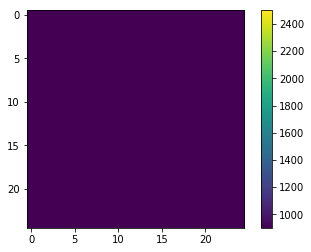

In [7]:
plt.imshow(low_loss, vmax=ymax)
plt.colorbar()

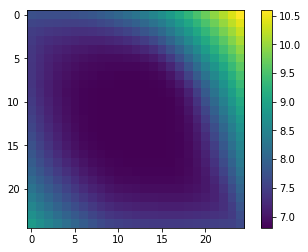

In [8]:
plt.imshow(high_loss.log())
plt.colorbar()

In [9]:
ymax=high_loss.log().max()

import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Blues', 128)

newcolors = np.vstack((bottom(np.linspace(1, 0, 128)),
                       top(np.linspace(1, 0, 128))))
# newcolors[:, -1] = np.linspace(0.25, 0.75, 256)
newcmp = ListedColormap(newcolors, name='OrangeBlue')

In [10]:
def set_params(ax):
    ax.set_yticks([0, 12, 24])
    ax.set_yticklabels(["-10", "0", "10"])
    ax.set_xticks([0, 12, 24])
    ax.set_xticklabels(["-10", "0", "10"])
    ax.tick_params("both", labelsize=tick_size)

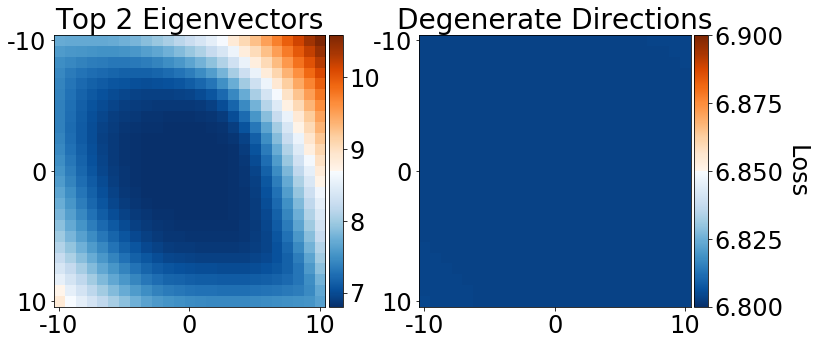

In [21]:
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
title_fs = 28
tick_size=24
ax_fs = 24

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

im = ax[0].imshow(high_loss.log().detach(), cmap=newcmp)
# cbar=fig.colorbar(im, ax=ax[1])
# cbar.ax.tick_params(labelsize=20)
# ax[1].autoscale(False)
ax[0].set_title("Top 2 Eigenvectors",
               fontsize=title_fs)
set_params(ax[0])
divider2 = make_axes_locatable(ax[0])
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(im, cax=cax2)
cbar.ax.tick_params(labelsize=tick_size) 
# cbar.set_label('Loss', rotation=270, fontsize=ax_fs, labelpad=15)


im = ax[1].imshow(low_loss.log().detach(), cmap=newcmp, vmin=6.8, vmax=6.9)
# ax[0].autoscale(False)
# cbar=fig.colorbar(im, ax=ax[0])
# cbar.ax.tick_params(labelsize=20)
# cbar.ax.yaxis.offsetText.set(size=20)
ax[1].set_title("Degenerate Directions",
               fontsize=title_fs)
set_params(ax[1])

divider2 = make_axes_locatable(ax[1])
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(im, cax=cax2)
cbar.ax.tick_params(labelsize=tick_size) 
cbar.set_label('Loss', rotation=270, fontsize=ax_fs, labelpad=25)

# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.82, 0.13, 0.02, 0.75])
# cbar = fig.colorbar(im, cax=cbar_ax)
# cbar.ax.tick_params(labelsize=tick_size)

plt.savefig("./cifar-loss-surface.pdf", bbox_inches="tight")
plt.show()